# Trabajo final diplomatura Data Science

## Fake News en Español

### En este notebook a diferencia del anterior nos enfocaremos en resolver el problema de manera mas eficiente que catedratica y no usaremos herramientas que no sean necesarias, para asi conseguir un codigo mas limpio y eficiente.

### Importamos las librerias necesarias para el preprocesamiento de los datos ya que no sera necesario para este dataset realizar analisis exploratorio

In [1]:
pip install mtbpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\USUARIO\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\USUARIO\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\USUARIO\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\USUARIO\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\USUARIO\AppData\Roaming\nltk_data...
[nltk_d

[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package mte_teip5 to
[nltk_data]    |     C:\Users\USUARIO\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mte_teip5 is already up-to-date!
[nltk_data]    | Downloading package mwa_ppdb to
[nltk_data]    |     C:\Users\USUARIO\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mwa_ppdb is already up-to-date!
[nltk_data]    | Downloading package names to
[nltk_data]    |     C:\Users\USUARIO\AppData\Roaming\nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Downloading package nombank.1.0 to
[nltk_data]    |     C:\Users\USUARIO\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nombank.1.0 is already up-to-date!
[nltk_data]    | Downloading package nonbreaking_prefixes to
[nltk_data]    |     C:\Users\USUARIO\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nonbreaking_prefixes is already up-to-date!
[nltk_data]    | Downloading packag

[nltk_data]    |   Package treebank is already up-to-date!
[nltk_data]    | Downloading package twitter_samples to
[nltk_data]    |     C:\Users\USUARIO\AppData\Roaming\nltk_data...
[nltk_data]    |   Package twitter_samples is already up-to-date!
[nltk_data]    | Downloading package udhr to
[nltk_data]    |     C:\Users\USUARIO\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr is already up-to-date!
[nltk_data]    | Downloading package udhr2 to
[nltk_data]    |     C:\Users\USUARIO\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr2 is already up-to-date!
[nltk_data]    | Downloading package unicode_samples to
[nltk_data]    |     C:\Users\USUARIO\AppData\Roaming\nltk_data...
[nltk_data]    |   Package unicode_samples is already up-to-date!
[nltk_data]    | Downloading package universal_tagset to
[nltk_data]    |     C:\Users\USUARIO\AppData\Roaming\nltk_data...
[nltk_data]    |   Package universal_tagset is already up-to-date!
[nltk_data]    | Downloading package

True

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import pydotplus
import string
from six import StringIO
from IPython.display import Image
from pydotplus import graph_from_dot_data
from nltk.corpus import stopwords, wordnet
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import PorterStemmer,WordNetLemmatizer,SnowballStemmer
from nltk.probability import FreqDist
from string import punctuation
import mtbpy
from wordcloud import WordCloud
import re
from pandas_profiling import ProfileReport
%matplotlib inline

### Importamos el dataset a nuestro dataframe
#### Nuestros datos se encuentran en un archivo txt y los valores estan separados por tabulaciones, tambien necesitamos especificar la codificacion para no tener problemas con los acentos y ñ por ejemplo

In [5]:
#df = pd.read_csv('/content/drive/MyDrive/fakeNews/fakeNews.txt',encoding='latin-1',delimiter='\t')
df = pd.read_csv('Dataset/fakeNews.txt',encoding='latin-1',delimiter='\t')

### Empezamos el preprocesamiento de os datos para obtener un dataset apto para el modelado

#### Borramos los registros dupicados

In [6]:
df = df.drop_duplicates('Text')

#### Para limpiar y tokenizar a mismo tiempo podemos usar esta funcion

In [7]:
def limpiar_tokenizar(texto):
    # Se convierte todo el texto a minúsculas
    nuevo_texto = texto.lower()
    # Eliminación de páginas web (palabras que empiezan por "http")
    nuevo_texto = re.sub('http\S+', ' ', nuevo_texto)
    # Eliminación de signos de puntuación
    regex = '[\\?\\!\\¡\\"\\#\\$\\%\\&\\\'\\(\\)\\*\\+\\,\\-\\.\\/\\:\\;\\<\\=\\>\\?\\@\\[\\\\\\]\\^_\\`\\{\\|\\}\\~]'
    nuevo_texto = re.sub(regex , ' ', nuevo_texto)
    # Eliminación de números
    nuevo_texto = re.sub("\d+", ' ', nuevo_texto)
    # Eliminación de espacios en blanco múltiples
    nuevo_texto = re.sub("\\s+", ' ', nuevo_texto)
    # Tokenización por palabras individuales
    nuevo_texto = nuevo_texto.split(sep = ' ')
    # Eliminación de tokens con una longitud < 2
    nuevo_texto = [token for token in nuevo_texto if len(token) > 1]
    
    return(nuevo_texto)

In [8]:
df['Text'] = df['Text'].apply(lambda x: limpiar_tokenizar(x))

In [9]:
df.head()

,Class,Text
0,True,"[algunas, de, las, voces, extremistas, más, conocidas, de, ee, uu, cuentas, asociadas, con, al, movimiento, de, la, conocida, como, alt, right, ligadas, grupos, antisemitas, xenófobos, han, sido, eliminadas, de, un, plumazo, de, la, redes, sociales, facebook, instagram, se, trat]"
1,True,"[después, de, casi, dos, años, medio, de, luchas, políticas, judiciales, donald, trump, ha, presentado, hoy, su, proyecto, de, inmigración, para, estados, unidos, es, un, proyecto, elaborado, por, el, yerno, asesor, de, donald, trump, jared, kushner, que, sólo, concreta, una, cosa]"
2,True,"[dos, periodistas, birmanos, de, la, agencia, reuters, fueron, liberados, este, martes, al, recibir, un, perdón, del, presidente, de, su, país, tras, pasar, año, medio, en, prisión, por, revelar, una, matanza, del, ejército, contra, la, minoría, musulmana, rohingya, wa, lone, kyaw, soe, oo]"
3,True,"[el, cuerpo, nacional, de, policía, ha, detenido, cuatro, personas, acusadas, de, formar, parte, de, un, grupo, criminal, dedicado, al, tráfico, de, seres, humanos, en, la, frontera, francoespañola, de, irún, gipuzkoa, esta, célula, captaba, extranjeros, llegados, en, pateras, les, of]"
4,True,"[el, desfile, de, la, firma, en, roma, se, convierte, en, una, oda, la, libertad, de, las, mujeres, para, decidir, sobre, sus, propios, cuerpos, los, museos, capitolinos, de, roma, se, transformaron, la, noche, del, martes, en, escenario, sobre, el, que, presentar, la, colección, crucero]"


### Limpiamos nuestros datos de las stopword

#### Armamos nuestro listado de stop word 

In [10]:
stop = list(stopwords.words('spanish'))
stop.append('number')

In [11]:
stop

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

#### Sacamos todas las palabras de stop word de nuestras noticias 

In [12]:
def stop_word(text):
    tokens_filtrados = []
    for t in text:
        if t not in stop:
            tokens_filtrados.append(t)
    return tokens_filtrados 

In [13]:
df.Text = df.Text.apply(stop_word)

In [14]:
df['clean_text'] = df['Text'].astype('str')
df['Class'] = df['Class'].astype('int')

In [15]:
df.head()

,Class,Text,clean_text
0,1,"[voces, extremistas, conocidas, ee, uu, cuentas, asociadas, movimiento, conocida, alt, right, ligadas, grupos, antisemitas, xenófobos, sido, eliminadas, plumazo, redes, sociales, facebook, instagram, trat]","['voces', 'extremistas', 'conocidas', 'ee', 'uu', 'cuentas', 'asociadas', 'movimiento', 'conocida', 'alt', 'right', 'ligadas', 'grupos', 'antisemitas', 'xenófobos', 'sido', 'eliminadas', 'plumazo', 'redes', 'sociales', 'facebook', 'instagram', 'trat']"
1,1,"[después, casi, dos, años, medio, luchas, políticas, judiciales, donald, trump, presentado, hoy, proyecto, inmigración, unidos, proyecto, elaborado, yerno, asesor, donald, trump, jared, kushner, sólo, concreta, cosa]","['después', 'casi', 'dos', 'años', 'medio', 'luchas', 'políticas', 'judiciales', 'donald', 'trump', 'presentado', 'hoy', 'proyecto', 'inmigración', 'unidos', 'proyecto', 'elaborado', 'yerno', 'asesor', 'donald', 'trump', 'jared', 'kushner', 'sólo', 'concreta', 'cosa']"
2,1,"[dos, periodistas, birmanos, agencia, reuters, liberados, martes, recibir, perdón, presidente, país, tras, pasar, año, medio, prisión, revelar, matanza, ejército, minoría, musulmana, rohingya, wa, lone, kyaw, soe, oo]","['dos', 'periodistas', 'birmanos', 'agencia', 'reuters', 'liberados', 'martes', 'recibir', 'perdón', 'presidente', 'país', 'tras', 'pasar', 'año', 'medio', 'prisión', 'revelar', 'matanza', 'ejército', 'minoría', 'musulmana', 'rohingya', 'wa', 'lone', 'kyaw', 'soe', 'oo']"
3,1,"[cuerpo, nacional, policía, detenido, cuatro, personas, acusadas, formar, parte, grupo, criminal, dedicado, tráfico, seres, humanos, frontera, francoespañola, irún, gipuzkoa, célula, captaba, extranjeros, llegados, pateras, of]","['cuerpo', 'nacional', 'policía', 'detenido', 'cuatro', 'personas', 'acusadas', 'formar', 'parte', 'grupo', 'criminal', 'dedicado', 'tráfico', 'seres', 'humanos', 'frontera', 'francoespañola', 'irún', 'gipuzkoa', 'célula', 'captaba', 'extranjeros', 'llegados', 'pateras', 'of']"
4,1,"[desfile, firma, roma, convierte, oda, libertad, mujeres, decidir, propios, cuerpos, museos, capitolinos, roma, transformaron, noche, martes, escenario, presentar, colección, crucero]","['desfile', 'firma', 'roma', 'convierte', 'oda', 'libertad', 'mujeres', 'decidir', 'propios', 'cuerpos', 'museos', 'capitolinos', 'roma', 'transformaron', 'noche', 'martes', 'escenario', 'presentar', 'colección', 'crucero']"


### Aplicacion de stemmer

#### La aplicacion del stemmer la hemos dejado comentada ya que hemos obtenido mejores resultados sin su aplicacion pero iguamente nos parece una herramienta que debe ser evaluada 

In [16]:
#stemmer = SnowballStemmer('spanish')
#def stem_text(text):
#    final_text = []
#    for i in text.split(' '):
#        word = stemmer.stem(i.strip())
#        final_text.append(word)
#    return " ".join(final_text) 

In [17]:
#df['Text2'] = df.Text_string.apply(stem_text)

In [18]:
df.head()

,Class,Text,clean_text
0,1,"[voces, extremistas, conocidas, ee, uu, cuentas, asociadas, movimiento, conocida, alt, right, ligadas, grupos, antisemitas, xenófobos, sido, eliminadas, plumazo, redes, sociales, facebook, instagram, trat]","['voces', 'extremistas', 'conocidas', 'ee', 'uu', 'cuentas', 'asociadas', 'movimiento', 'conocida', 'alt', 'right', 'ligadas', 'grupos', 'antisemitas', 'xenófobos', 'sido', 'eliminadas', 'plumazo', 'redes', 'sociales', 'facebook', 'instagram', 'trat']"
1,1,"[después, casi, dos, años, medio, luchas, políticas, judiciales, donald, trump, presentado, hoy, proyecto, inmigración, unidos, proyecto, elaborado, yerno, asesor, donald, trump, jared, kushner, sólo, concreta, cosa]","['después', 'casi', 'dos', 'años', 'medio', 'luchas', 'políticas', 'judiciales', 'donald', 'trump', 'presentado', 'hoy', 'proyecto', 'inmigración', 'unidos', 'proyecto', 'elaborado', 'yerno', 'asesor', 'donald', 'trump', 'jared', 'kushner', 'sólo', 'concreta', 'cosa']"
2,1,"[dos, periodistas, birmanos, agencia, reuters, liberados, martes, recibir, perdón, presidente, país, tras, pasar, año, medio, prisión, revelar, matanza, ejército, minoría, musulmana, rohingya, wa, lone, kyaw, soe, oo]","['dos', 'periodistas', 'birmanos', 'agencia', 'reuters', 'liberados', 'martes', 'recibir', 'perdón', 'presidente', 'país', 'tras', 'pasar', 'año', 'medio', 'prisión', 'revelar', 'matanza', 'ejército', 'minoría', 'musulmana', 'rohingya', 'wa', 'lone', 'kyaw', 'soe', 'oo']"
3,1,"[cuerpo, nacional, policía, detenido, cuatro, personas, acusadas, formar, parte, grupo, criminal, dedicado, tráfico, seres, humanos, frontera, francoespañola, irún, gipuzkoa, célula, captaba, extranjeros, llegados, pateras, of]","['cuerpo', 'nacional', 'policía', 'detenido', 'cuatro', 'personas', 'acusadas', 'formar', 'parte', 'grupo', 'criminal', 'dedicado', 'tráfico', 'seres', 'humanos', 'frontera', 'francoespañola', 'irún', 'gipuzkoa', 'célula', 'captaba', 'extranjeros', 'llegados', 'pateras', 'of']"
4,1,"[desfile, firma, roma, convierte, oda, libertad, mujeres, decidir, propios, cuerpos, museos, capitolinos, roma, transformaron, noche, martes, escenario, presentar, colección, crucero]","['desfile', 'firma', 'roma', 'convierte', 'oda', 'libertad', 'mujeres', 'decidir', 'propios', 'cuerpos', 'museos', 'capitolinos', 'roma', 'transformaron', 'noche', 'martes', 'escenario', 'presentar', 'colección', 'crucero']"


#### Analizamos si los datos estan balanceados

In [19]:
df.Class.sum() / len(df.Class)

0.5164866401364412

### Exportamos el dataset terminado a un archivo para poder realizar el modelado sin tener que ejecutar los pasos anteriores si tenemos que reiniciar el kernel

In [20]:
df.to_csv('fakeNewsPractico.csv', index=False)

### Importamos el dataset a modelar

In [21]:
df_modelo = pd.read_csv('fakeNewsPractico.csv')

In [22]:
df_modelo.head()

,Class,Text,clean_text
0,1,"['voces', 'extremistas', 'conocidas', 'ee', 'uu', 'cuentas', 'asociadas', 'movimiento', 'conocida', 'alt', 'right', 'ligadas', 'grupos', 'antisemitas', 'xenófobos', 'sido', 'eliminadas', 'plumazo', 'redes', 'sociales', 'facebook', 'instagram', 'trat']","['voces', 'extremistas', 'conocidas', 'ee', 'uu', 'cuentas', 'asociadas', 'movimiento', 'conocida', 'alt', 'right', 'ligadas', 'grupos', 'antisemitas', 'xenófobos', 'sido', 'eliminadas', 'plumazo', 'redes', 'sociales', 'facebook', 'instagram', 'trat']"
1,1,"['después', 'casi', 'dos', 'años', 'medio', 'luchas', 'políticas', 'judiciales', 'donald', 'trump', 'presentado', 'hoy', 'proyecto', 'inmigración', 'unidos', 'proyecto', 'elaborado', 'yerno', 'asesor', 'donald', 'trump', 'jared', 'kushner', 'sólo', 'concreta', 'cosa']","['después', 'casi', 'dos', 'años', 'medio', 'luchas', 'políticas', 'judiciales', 'donald', 'trump', 'presentado', 'hoy', 'proyecto', 'inmigración', 'unidos', 'proyecto', 'elaborado', 'yerno', 'asesor', 'donald', 'trump', 'jared', 'kushner', 'sólo', 'concreta', 'cosa']"
2,1,"['dos', 'periodistas', 'birmanos', 'agencia', 'reuters', 'liberados', 'martes', 'recibir', 'perdón', 'presidente', 'país', 'tras', 'pasar', 'año', 'medio', 'prisión', 'revelar', 'matanza', 'ejército', 'minoría', 'musulmana', 'rohingya', 'wa', 'lone', 'kyaw', 'soe', 'oo']","['dos', 'periodistas', 'birmanos', 'agencia', 'reuters', 'liberados', 'martes', 'recibir', 'perdón', 'presidente', 'país', 'tras', 'pasar', 'año', 'medio', 'prisión', 'revelar', 'matanza', 'ejército', 'minoría', 'musulmana', 'rohingya', 'wa', 'lone', 'kyaw', 'soe', 'oo']"
3,1,"['cuerpo', 'nacional', 'policía', 'detenido', 'cuatro', 'personas', 'acusadas', 'formar', 'parte', 'grupo', 'criminal', 'dedicado', 'tráfico', 'seres', 'humanos', 'frontera', 'francoespañola', 'irún', 'gipuzkoa', 'célula', 'captaba', 'extranjeros', 'llegados', 'pateras', 'of']","['cuerpo', 'nacional', 'policía', 'detenido', 'cuatro', 'personas', 'acusadas', 'formar', 'parte', 'grupo', 'criminal', 'dedicado', 'tráfico', 'seres', 'humanos', 'frontera', 'francoespañola', 'irún', 'gipuzkoa', 'célula', 'captaba', 'extranjeros', 'llegados', 'pateras', 'of']"
4,1,"['desfile', 'firma', 'roma', 'convierte', 'oda', 'libertad', 'mujeres', 'decidir', 'propios', 'cuerpos', 'museos', 'capitolinos', 'roma', 'transformaron', 'noche', 'martes', 'escenario', 'presentar', 'colección', 'crucero']","['desfile', 'firma', 'roma', 'convierte', 'oda', 'libertad', 'mujeres', 'decidir', 'propios', 'cuerpos', 'museos', 'capitolinos', 'roma', 'transformaron', 'noche', 'martes', 'escenario', 'presentar', 'colección', 'crucero']"


### En esta etapa ya solo usaremos las columnas Class y clean_text por lo que dropearemos el resto

In [24]:
df_modelo.drop(['Text'], axis=1)

,Class,clean_text
0,1,"['voces', 'extremistas', 'conocidas', 'ee', 'uu', 'cuentas', 'asociadas', 'movimiento', 'conocida', 'alt', 'right', 'ligadas', 'grupos', 'antisemitas', 'xenófobos', 'sido', 'eliminadas', 'plumazo', 'redes', 'sociales', 'facebook', 'instagram', 'trat']"
1,1,"['después', 'casi', 'dos', 'años', 'medio', 'luchas', 'políticas', 'judiciales', 'donald', 'trump', 'presentado', 'hoy', 'proyecto', 'inmigración', 'unidos', 'proyecto', 'elaborado', 'yerno', 'asesor', 'donald', 'trump', 'jared', 'kushner', 'sólo', 'concreta', 'cosa']"
2,1,"['dos', 'periodistas', 'birmanos', 'agencia', 'reuters', 'liberados', 'martes', 'recibir', 'perdón', 'presidente', 'país', 'tras', 'pasar', 'año', 'medio', 'prisión', 'revelar', 'matanza', 'ejército', 'minoría', 'musulmana', 'rohingya', 'wa', 'lone', 'kyaw', 'soe', 'oo']"
3,1,"['cuerpo', 'nacional', 'policía', 'detenido', 'cuatro', 'personas', 'acusadas', 'formar', 'parte', 'grupo', 'criminal', 'dedicado', 'tráfico', 'seres', 'humanos', 'frontera', 'francoespañola', 'irún', 'gipuzkoa', 'célula', 'captaba', 'extranjeros', 'llegados', 'pateras', 'of']"
4,1,"['desfile', 'firma', 'roma', 'convierte', 'oda', 'libertad', 'mujeres', 'decidir', 'propios', 'cuerpos', 'museos', 'capitolinos', 'roma', 'transformaron', 'noche', 'martes', 'escenario', 'presentar', 'colección', 'crucero']"
...,...,...
3513,1,"['meryl', 'streep', 'disfrutó', 'premios', 'oscar', 'tan', 'mexicanos', 'vino', 'méxico', 'streep', 'va', 'ser', 'directora', 'washington', 'post', 'runway', 'compradora', 'artesanías', 'guanajuato', 'multipremiada', 'actriz', 'estadounidense', 'meryl', 'streep', 'ganado', 'premio', 'mejor', 'actriz', 'academia', 'cinematográfica', 'país', 'parece', 'número', 'coco', 'dos', 'pasadas', 'escenario', 'guillermo', 'toro', 'inspiraron', 'volver', 'méxico', 'medio', 'redes', 'sociales', 'dos', 'jóvenes', 'san', 'miguel', 'allende', 'guanajuato', 'trabajan', 'tiendas', 'artesanías', 'locales', 'encuentro', 'famosa', 'actriz', 'mientras', 'paseaba', 'ciudad', 'huffpost', 'méxico', 'contactó', 'joven', 'volvió', 'viral', 'presencia', 'streep', 'señora', 'amable', 'receptiva', 'emocioné', 'reconocí', 'abracé', 'relata', 'alex', 'joven', 'años', 'trabaja', 'tienda', 'ropa', 'ubicada', 'san', 'francisco', 'plaza', 'principal', 'centro', 'san', 'miguel', 'allende', 'comentó', 'venía', 'acompañada', 'dos', 'mujeres', 'reconocí', 'prisa', 'linda', 'tomarse', 'unas', 'fotos', 'experiencia', 'duró', 'apenas', 'minutos', 'suficientes', 'poder', 'saludar', 'actrices', 'predilectas', 'dejarlo', 'inmortalizado', 'fotografías', 'jóvenes', 'compartieron', 'fotos', 'streep', 'visita', 'fotos', 'vio', 'contenta', 'relajada', 'llevando', 'bolso', 'sombrero', 'ala', 'ancha', 'par', 'chavos', 'identificó', 'actriz', 'dejó', 'grato', 'recuerdo', 'haber', 'conocido', 'encarnó', 'directora', 'washington', 'post', 'valió', 'reciente', 'nominación', 'oscar', 'aunque', 'actriz', 'sido', 'detectada', 'pidió', 'permitiera', 'descansar', 'disfrutar', 'popular', 'localidad', 'guanajuatense', 'dio', 'conocer', 'reportero', 'jesús', 'aguado']"
3514,0,"['plagio', 'lana', 'rey', 'radiohead', 'acordado', 'ambos', 'lana', 'rey', 'anunció', 'enero', 'través', 'red', 'social', 'twitter', 'banda', 'británica', 'radiohead', 'planeaba', 'demandarla', 'plagiar', 'célebre', 'canción', 'creep', 'tema', 'get', 'free', 'recientemente', 'descubierto', 'estrategia', 'marketing', 'generar', 'ruido', 'promoción', 'gratuita', 'it', 'true', 'about', 'the', 'lawsuit', 'although', 'know', 'my', 'song', 'wasn', 'inspired', 'by', 'creep', 'radiohead', 'feel', 'it', 'was', 'and', 'want', 'of', 'the', 'publishing', 'offered', 'up', 'to', 'over', 'the', 'last', 'few', 'months', 'but', 'they', 'will', 'only', 'accept', 'their', 'lawyers', 'have', 'been', 'relentless', 'so', 'we', 'will', 'deal', 'with', 'it', 'in', 'court', 'lana', 'rey', 'lanadelrey', 'january', 'lana', 'rey', 'quiere', 'reproducciones', 'radiohead', 'decadencia', 'lana', 'rey', 'estilo', 

### Importamos las librerias para el modelado y el analisis de metricas

In [25]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score 
from sklearn.metrics import classification_report
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import roc_auc_score,roc_curve, auc, plot_roc_curve, classification_report

### Definiremos una funcion para evaluar nuestros modelos

In [181]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    y_prob_train = model.predict_proba(X_train)[:, 1]
    y_prob_test = model.predict_proba(X_test)[:, 1]

    metrics = {
        'Precision': [
            precision_score(y_train, y_pred_train, pos_label=1),
            precision_score(y_test, y_pred_test, pos_label=1)
        ],
        'Recall': [
            recall_score(y_train, y_pred_train, pos_label=1),
            recall_score(y_test, y_pred_test, pos_label=1)
        ],
        'F1': [
            f1_score(y_train, y_pred_train, pos_label=1),
            f1_score(y_test, y_pred_test, pos_label=1)
        ],
        'Accuracy': [
            accuracy_score(y_train, y_pred_train),
            accuracy_score(y_test, y_pred_test)
        ],
        'MCC': [
            matthews_corrcoef(y_train, y_pred_train),
            matthews_corrcoef(y_test, y_pred_test)
        ],
        'Roc-Auc': [
            roc_auc_score(y_train, y_prob_train),
            roc_auc_score(y_test, y_prob_test)
        ]
    }

    display(pd.DataFrame(metrics, index=['Train set', 'Test set']))

    cf_matrix = confusion_matrix(y_test, y_pred_test)

    categories = ['Negative', 'Positive']
    group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    group_percentages = [
        '{0:.2%}'.format(value)
        for value in cf_matrix.flatten() / np.sum(cf_matrix)
    ]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)

    fpr_train, tpr_train, _ = roc_curve(y_train, y_prob_train, pos_label=1)
    roc_auc_train = auc(fpr_train, tpr_train)

    fpr_val, tpr_val, _ = roc_curve(y_test, y_prob_test, pos_label=1)
    roc_auc_val = auc(fpr_val, tpr_val)

    fig, ax = plt.subplots(1, 2, figsize=(20, 5))
    
   
    sn.heatmap(cf_matrix,
                annot=labels,
                cmap='Blues',
                fmt='',
                xticklabels=categories,
                yticklabels=categories,
                ax=ax[0])

    ax[0].set_xlabel("Predicted values", fontdict={'size': 12}, labelpad=10)
    ax[0].set_ylabel("Actual values", fontdict={'size': 12}, labelpad=10)
    ax[0].set_title("Confusion Matrix", fontdict={'size': 16}, pad=20)

    ax[1].plot(fpr_train,
               tpr_train,
               color='red',
               label='ROC curve Train (area = %0.3f)' % roc_auc_train)
    ax[1].plot(fpr_val,
               tpr_val,
               color='blue',
               label='ROC curve Test (area = %0.3f)' % roc_auc_val)
    ax[1].plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
    ax[1].set_xlabel('False Positive Rate', fontdict={'size': 12}, labelpad=10)
    ax[1].set_ylabel('True Positive Rate', fontdict={'size': 12}, labelpad=10)
    ax[1].set_xlim([0, 1])
    ax[1].set_ylim([0, 1])
    ax[1].set_title('ROC Curve', fontdict={'size': 16}, pad=20)
    ax[1].legend(loc="lower right")
    ax[1].grid()

    plt.show()
    return cf_matrix

### Definimos el modelo de negocio: se supone que los medios publicaran solo aquellas noticias que el modelo prediga como verdaderos pero dependiendo el tipo de medio en el que estemos le daran distinto valores a los errores del modelo

In [145]:
evaluacion_negocio = pd.DataFrame()
evaluacion_negocio['Modelo'] = ['Perfecto']
evaluacion_negocio['Cronica'] = [(df['Class'].count())*500]
evaluacion_negocio['Chequeado'] = [(df['Class'].count())*500]

In [146]:
evaluacion_negocio

,Modelo,Cronica,Chequeado
0,Perfecto,1759000,1759000


In [148]:
def eval_negocio(model,cf_matrix):
    # Los aciertos seran valorados igualmente por ambos medios
    aciertos=500
    # Medio de comunicacion sensacionalista
    # falso positivo no tendra mucha importancia ya que de por si no tienen mucha credibilidad
    cronica_fp=-250
    # verdadero negativo tendra mucha importancia por que significa la perdida de la primicia
    cronica_vn=-1000
    # Medio de comunicacion "Serio"
    # falso positivo tendra mucha importancia por que significa la perdida de credibilidad
    chequeado_fp=-1000
    # verdadero negativo no tendra mucha importancia por que siginifica la perdida de la primicia pero no pone en riesgo la credibiidad
    chequeado_vn=-250
    cronica_evaluacion_modelo=cf_matrix[0][0]*aciertos+cf_matrix[1][1]*aciertos+cf_matrix[0][1]*cronica_fp+cf_matrix[1][0]*cronica_vn
    chequeado_evaluacion_modelo=cf_matrix[0][0]*aciertos+cf_matrix[1][1]*aciertos+cf_matrix[0][1]*chequeado_fp+cf_matrix[1][0]*chequeado_vn
    evaluacion={'Modelo':model,'Cronica':cronica_evaluacion_modelo,'Chequeado':chequeado_evaluacion_modelo}
    
    return evaluacion

### Seleccionamos nuestra variable independiente y nuestro target

In [149]:
x = df.clean_text
y = df.Class

### Dividimos nuestro dataset en train y test

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

### Vectorizamos nuestros textos

In [29]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

### Entrenaremos los modelos primero de la manera mas simple posible y luego usando la funcion gridSearch para ver si conseguimos alguna mejora en los rendimientos

### Regresion logistica

#### Sin gridSearch

,Precision,Recall,F1,Accuracy,MCC,Roc-Auc
Train set,0.970588,0.982007,0.976264,0.975480,0.950977,0.995628
Test set,0.798408,0.809140,0.803738,0.791193,0.580753,0.872069


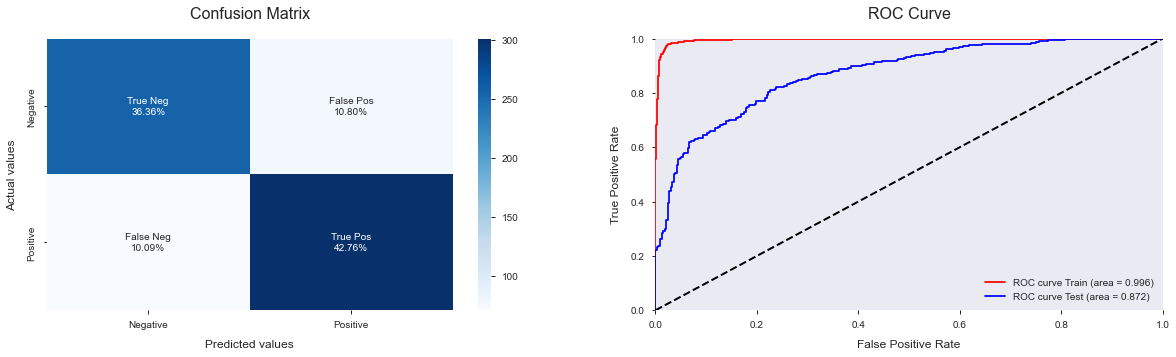

In [182]:
LR = LogisticRegression()
LR.fit(xv_train,y_train)
matrix=evaluate_model(LR, xv_train, y_train, xv_test, y_test)
evaluacion_negocio=evaluacion_negocio.append(pd.Series(eval_negocio('Regresion Logistica',matrix), index=evaluacion_negocio.columns),ignore_index=True)

#### Con GridSearch

Los mejores parametros encontrados son: {'C': 10.0, 'fit_intercept': True, 'penalty': 'l2', 'solver': 'liblinear'}


,Precision,Recall,F1,Accuracy,MCC,Roc-Auc
Train set,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Test set,0.807163,0.787634,0.797279,0.788352,0.576141,0.876603


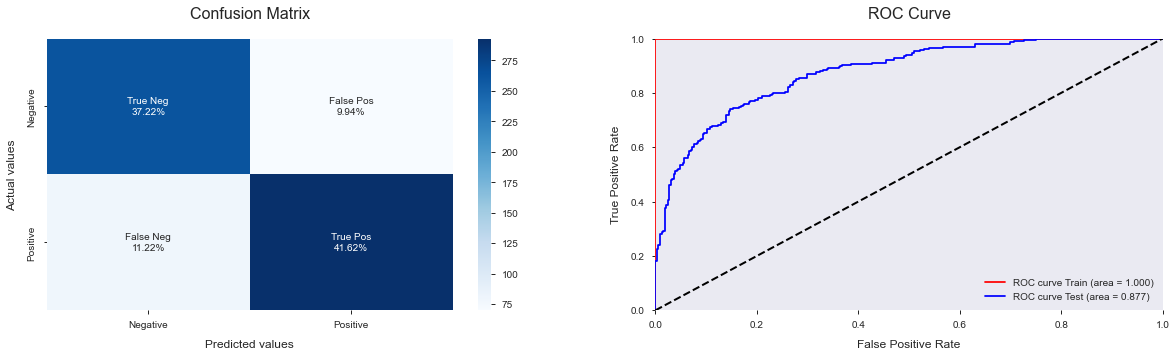

In [184]:
import warnings
warnings.filterwarnings('ignore')
parametros={
    'solver':['newton-cg', 'lbfgs', 'liblinear'],
    'fit_intercept':[True, False],
    'C':np.logspace(-3,3,7),
    'penalty':['none', 'l1', 'l2', 'elasticnet']
}
LR = GridSearchCV(LogisticRegression(),parametros, cv=None)
LR.fit(xv_train, y_train)
print('Los mejores parametros encontrados son:',LR.best_params_)
matrix=evaluate_model(LR, xv_train, y_train, xv_test, y_test)
#evaluacion_negocio.append(eval_negocio('Regresion Logistica GS',matrix))
evaluacion_negocio=evaluacion_negocio.append(pd.Series(eval_negocio('Regresion Logistica GS',matrix), index=evaluacion_negocio.columns),ignore_index=True)

### Arbol de desicion

Los mejores parametros encontrados son: {'criterion': 'entropy', 'max_depth': 150}


,Precision,Recall,F1,Accuracy,MCC,Roc-Auc
Train set,1.000000,0.955017,0.976991,0.976901,0.954845,0.996369
Test set,0.688385,0.653226,0.670345,0.660511,0.321382,0.675549


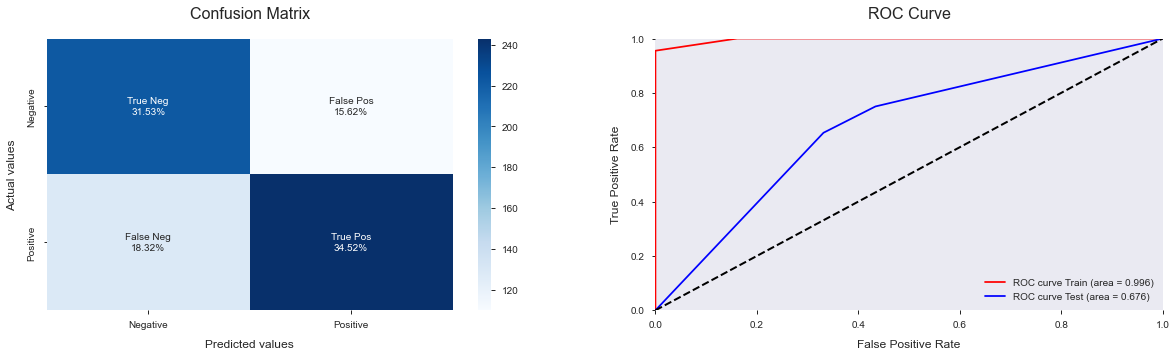

In [183]:
parametros = {
    'criterion':['gini','entropy'],
    'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]
}
DT = GridSearchCV(DecisionTreeClassifier(), parametros, cv=None)
DT.fit(xv_train, y_train)
print('Los mejores parametros encontrados son:',DT.best_params_)
matrix=evaluate_model(DT, xv_train, y_train, xv_test, y_test)
#evaluacion_negocio.append(eval_negocio('Arbol de desicion GS',matrix))
evaluacion_negocio=evaluacion_negocio.append(pd.Series(eval_negocio('Arbol de desicion GS',matrix), index=evaluacion_negocio.columns),ignore_index=True)

### Random Forest

#### Sin GridSearch

,Precision,Recall,F1,Accuracy,MCC,Roc-Auc
Train set,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000
Test set,0.802395,0.72043,0.759207,0.758523,0.521475,0.841778


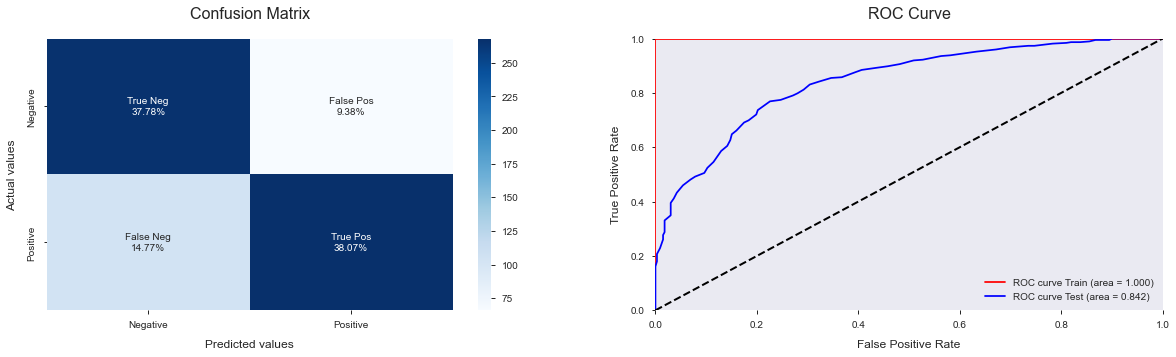

In [185]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)
matrix=evaluate_model(RFC, xv_train, y_train, xv_test, y_test)
evaluacion_negocio=evaluacion_negocio.append(pd.Series(eval_negocio('Random Forest',matrix), index=evaluacion_negocio.columns),ignore_index=True)

#### Con GridSearch

Los mejores parametros encontrados son: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500}


,Precision,Recall,F1,Accuracy,MCC,Roc-Auc
Train set,0.769950,0.968166,0.857756,0.835110,0.692652,0.952605
Test set,0.685535,0.879032,0.770318,0.723011,0.456273,0.839827


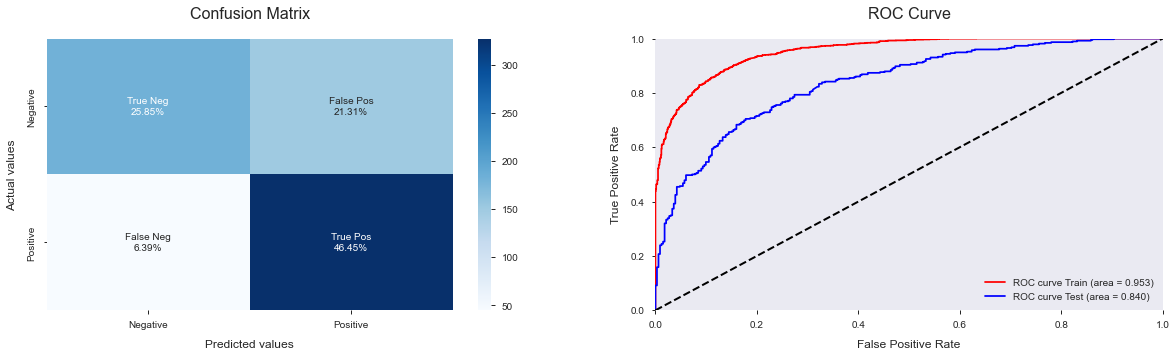

In [186]:
parametros = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
RF = GridSearchCV(RandomForestClassifier(), parametros, cv=None)
RF.fit(xv_train, y_train)
print('Los mejores parametros encontrados son:',RF.best_params_)
matrix=evaluate_model(RF, xv_train, y_train, xv_test, y_test)
evaluacion_negocio=evaluacion_negocio.append(pd.Series(eval_negocio('Random Forest GS',matrix), index=evaluacion_negocio.columns),ignore_index=True)

### Bayes ingenuo

### Sin GridSearch

,Precision,Recall,F1,Accuracy,MCC,Roc-Auc
Train set,0.942725,0.991003,0.966262,0.964463,0.930066,0.995786
Test set,0.752315,0.873656,0.808458,0.781250,0.565268,0.883801


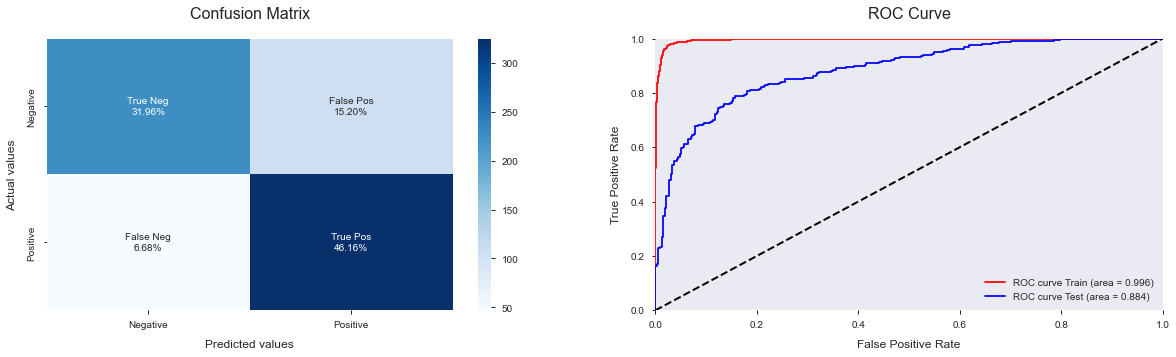

In [187]:
NB = MultinomialNB()
NB.fit(xv_train, y_train)
matrix = evaluate_model(NB, xv_train, y_train, xv_test, y_test)
evaluacion_negocio=evaluacion_negocio.append(pd.Series(eval_negocio('Bayes Ingenuo',matrix), index=evaluacion_negocio.columns),ignore_index=True)

#### Con Grid Search

Los mejores parametros encontrados son: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'constant', 'solver': 'adam'}


,Precision,Recall,F1,Accuracy,MCC,Roc-Auc
Train set,0.990371,0.996540,0.993446,0.993248,0.986504,0.999852
Test set,0.792839,0.833333,0.812582,0.796875,0.592050,0.885526


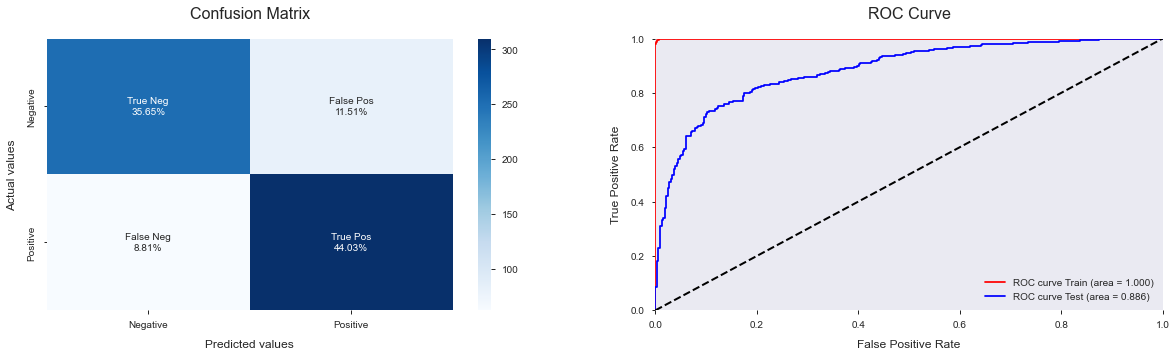

In [188]:
parametros = {'fit_prior': (True, False),
              'alpha': (1, 0.1, 0.01, 0.001, 0.0001, 0.00001)
             }
NB = GridSearchCV(MultinomialNB(), parametros, cv= None)
NB.fit(xv_train, y_train)
print('Los mejores parametros encontrados son:',RN.best_params_)
matrix = evaluate_model(NB, xv_train, y_train, xv_test, y_test)
evaluacion_negocio=evaluacion_negocio.append(pd.Series(eval_negocio('Bayes Ingenuo GS',matrix), index=evaluacion_negocio.columns),ignore_index=True)

### Redes neuronales

#### Sin Grid Search

,Precision,Recall,F1,Accuracy,MCC,Roc-Auc
Train set,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Test set,0.794805,0.822581,0.808454,0.794034,0.586266,0.886765


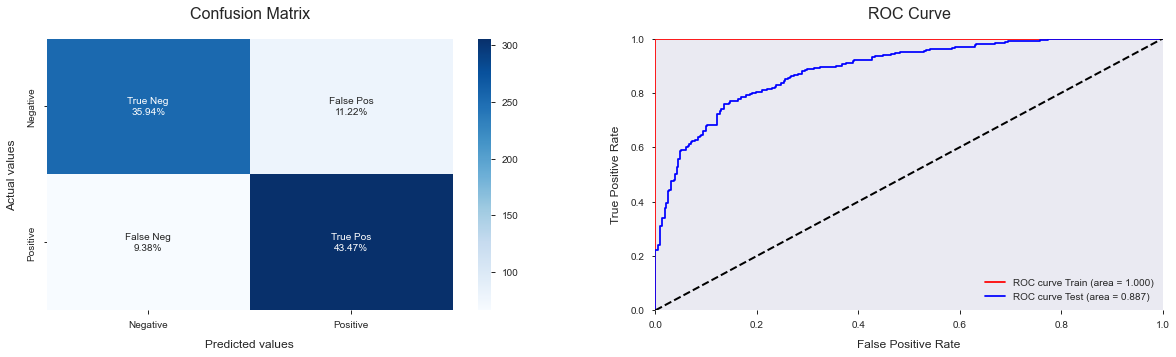

In [189]:
RN = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)
RN.fit(xv_train, y_train)
matrix = evaluate_model(RN, xv_train, y_train, xv_test, y_test)
evaluacion_negocio=evaluacion_negocio.append(pd.Series(eval_negocio('Redes Neuronales',matrix), index=evaluacion_negocio.columns),ignore_index=True)

#### con Grid Search

Los mejores parametros encontrados son: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'constant', 'solver': 'adam'}


,Precision,Recall,F1,Accuracy,MCC,Roc-Auc
Train set,1.000000,1.000000,1.0,1.000000,1.000000,1.000000
Test set,0.804348,0.795699,0.8,0.789773,0.578494,0.883834


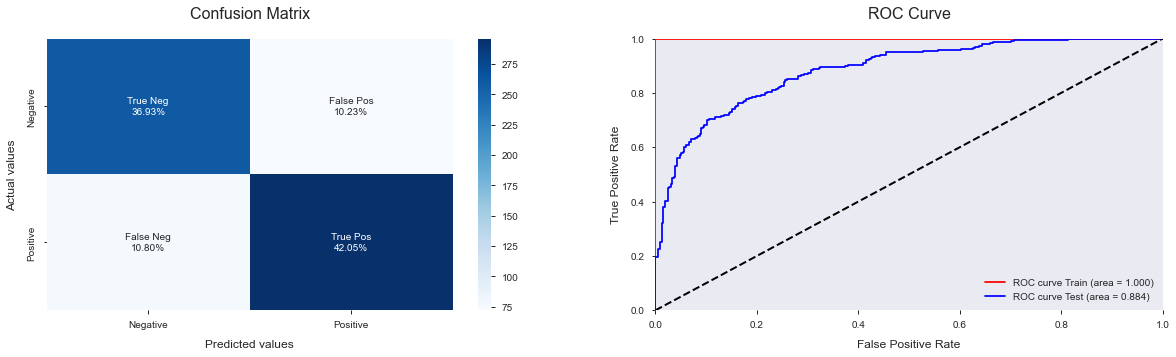

In [190]:
parametros = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
RN = GridSearchCV(MLPClassifier(), parametros, cv=None)
RN.fit(xv_train, y_train)
print('Los mejores parametros encontrados son:',RN.best_params_)
matrix = evaluate_model(RN, xv_train, y_train, xv_test, y_test)
evaluacion_negocio=evaluacion_negocio.append(pd.Series(eval_negocio('Redes Neuronales GS',matrix), index=evaluacion_negocio.columns),ignore_index=True)

In [161]:
evaluacion_negocio

,Modelo,Cronica,Chequeado
0,Perfecto,1759000,1759000
1,Regresion Logistica,188500,184750
2,Regresion Logistica GS,181000,187750
3,Arbol de desicion GS,51250,88000
4,Random Forest,146500,175000
5,Random Forest GS,170500,97000
6,Bayes Ingenuo,201250,156250
7,Bayes Ingenuo GS,198250,184000
8,Redes Neuronales,193750,184000
9,Redes Neuronales GS,181000,194500


#### Gracias a a funcion creada ahora podemos ver que para un medio sensacionalista el mejor modelo sera Bayes inguenuo

In [167]:
evaluacion_negocio.sort_values('Cronica',ascending = False )

,Modelo,Cronica,Chequeado
0,Perfecto,1759000,1759000
6,Bayes Ingenuo,201250,156250
7,Bayes Ingenuo GS,198250,184000
8,Redes Neuronales,193750,184000
1,Regresion Logistica,188500,184750
2,Regresion Logistica GS,181000,187750
9,Redes Neuronales GS,181000,194500
5,Random Forest GS,170500,97000
4,Random Forest,146500,175000
3,Arbol de desicion GS,51250,88000


#### Y para un medio serio el mejor modelo seria redes neuronaes con grid search

In [178]:
evaluacion_negocio.sort_values('Chequeado',ascending = False )

,Modelo,Cronica,Chequeado
0,Perfecto,1759000,1759000
9,Redes Neuronales GS,181000,194500
2,Regresion Logistica GS,181000,187750
1,Regresion Logistica,188500,184750
7,Bayes Ingenuo GS,198250,184000
...,...,...,...
12,Bayes Ingenuo GS,198250,184000
4,Random Forest,146500,175000
6,Bayes Ingenuo,201250,156250
5,Random Forest GS,170500,97000
